<a href="https://colab.research.google.com/github/yoonju977/CV_hufs_25-1/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

#1. 이미지 다섯장을 수집하여 이미지 예측 실험

In [3]:
model = ResNet50(weights='imagenet')


image_paths = [
    "/content/drive/MyDrive/HUFS/dataset_CV/cake.jpeg",
    "/content/drive/MyDrive/HUFS/dataset_CV/car.jpeg",
    "/content/drive/MyDrive/HUFS/dataset_CV/cup.jpeg",
    "/content/drive/MyDrive/HUFS/dataset_CV/doll.jpeg",
    "/content/drive/MyDrive/HUFS/dataset_CV/flower.jpeg"
]

#이미지 전처리
images = []
processed_images = []

for path in image_paths:
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    images.append(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    processed_images.append(img_array)

#배치 생성 및 예측, 디코딩
input_batch = np.vstack(processed_images)

predictions = model.predict(input_batch)

decoded_predictions = decode_predictions(predictions, top=3)

#결과출력(Top3까지)
for i, pred in enumerate(decoded_predictions):
    print(f"Image: {image_paths[i].split('/')[-1]}")
    for rank, (class_id, class_name, score) in enumerate(pred):
        print(f"  Top {rank+1}: {class_name} ({score*100:.2f}%)")
    print("-" * 50)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image: cake.jpeg
  Top 1: bakery (97.49%)
  Top 2: bagel (1.68%)
  Top 3: cheeseburger (0.21%)
--------------------------------------------------
Image: car.jpeg
  Top 1: amphibian (13.18%)
  Top 2: jeep (12.12%)
  Top 3: recreational_vehicle (11.16%)
--------------------------------------------------
Image: cup.jpeg
  Top 1: laptop (43.20%)
  Top 2: notebook (26.24%)
  Top 3: mouse (10.95%)
--------------------------------------------------
Image: doll.jpeg
  Top 1: teddy (33.80%)
  Top 2: bonnet (11.56%)
  Top 3: ski_mask (7.87%)
--------------------------------------------------
Image: flower.jpeg
  Top 1: manhole_cover (32.61%)
  Top 2: doormat (9.86%)
  Top 3: umbrella (8.99%)
--------------------------------------------------


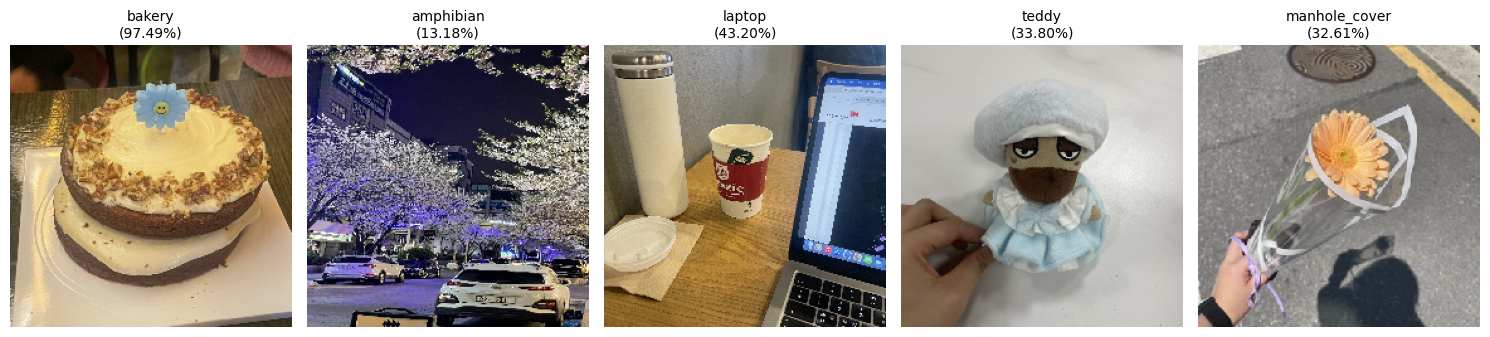

In [4]:
#이미지 및 예측 결과 시각화
plt.figure(figsize=(15, 6))

for i in range(len(images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    #Top-1 예측 결과
    top_pred = decoded_predictions[i][0]
    class_name = top_pred[1]
    score = top_pred[2]

    plt.title(f"{class_name}\n({score*100:.2f}%)", fontsize=10)

plt.tight_layout()
plt.show()

#2. RestNet50의 구조와 파라미터 수

In [5]:
from tensorflow.keras.applications import ResNet50

#모델 불러오기
model = ResNet50(weights='imagenet')

#모델 구조 요약 출력
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

#3. RestNet50으로 cats_and_dogs 파일 학습 및 실험

In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers


!unzip -q "/content/drive/MyDrive/HUFS/dataset_CV/cats_and_dogs_small.zip" -d /content/


base_dir = '/content/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#ResNet50 conv_base
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#특성 추출
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

#데이터 처리 및 훈련
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 5 * 5 * 2048))
validation_features = np.reshape(validation_features, (1000, 5 * 5 * 2048))
test_features = np.reshape(test_features, (1000, 5 * 5 * 2048))

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=5 * 5 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.4978 - loss: 0.7934 - val_acc: 0.5360 - val_loss: 0.6716
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5652 - loss: 0.6929 - val_acc: 0.6320 - val_loss: 0.6500
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5796 - loss: 0.6791 - val_acc: 0.6330 - val_loss: 0.6457
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5612 - loss: 0.6769 - val_acc: 0.6170 - val_loss: 0.6429
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5950 - loss: 0.6666 - val_acc: 0.6490 - val_loss: 0.6366
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6154 - loss: 0.6479 - val_acc: 0.6530 - val_loss: 0.6318
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6163 - loss: 0.6577 - val_acc: 0.6160 - val_loss: 0.6370
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6363 - loss: 0.6430 - val_acc: 0.6690 - val_loss: 0.6254
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

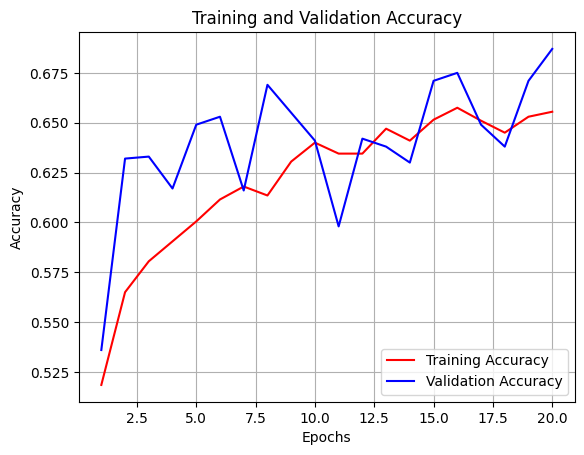

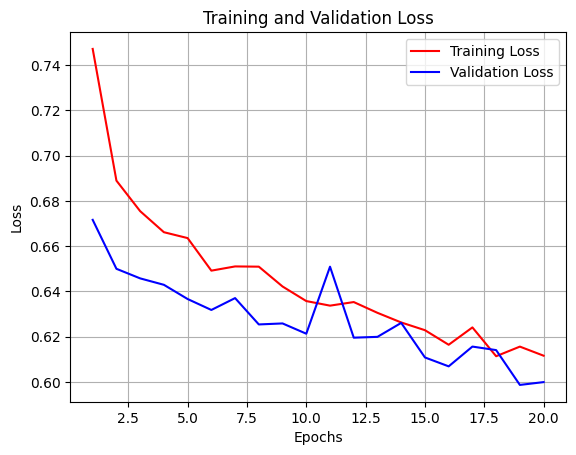

In [7]:
#훈련 결과 시각화
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#4. VGG16과 ResNet50 비교 및 include_top 제거 효과

###4-1.VGG16 vs ResNet50 구조 및 파라미터 비교 (`include_top=False`)

| 항목                         | VGG16                          | ResNet50                       |
|------------------------------|---------------------------------|--------------------------------|
| 입력 이미지 크기              | (150, 150, 3)                  | (150, 150, 3)                  |
| 출력 Feature Map             | (4, 4, 512)                    | (5, 5, 2048)                   |
| Flatten 후 차원 수            | 8192 (= 4×4×512)               | 51200 (= 5×5×2048)             |
| 최상위 FC 구성               | Dense(256) → Dropout → Dense(1)| Dense(256) → Dropout → Dense(1)|
| FC 계층 학습 파라미터 수      | 약 2.1M                        | 약 13.1M                       |
| 전체 파라미터 수             | 약 16M                         | 약 25.6M                       |
| 학습 속도                    | 빠름                           | 느림                           |
| 일반화 성능 (Validation acc) | 양호                           | 일반적으로 더 우수함           |

---

###4-2.include_top=False 설정의 의미와 결과

- `include_top=True`는 ImageNet용 원래 FC 분류기(`Dense(1000)` 등)를 포함한 구조.
- `include_top=False`는 **CNN feature 추출기만 불러오고 최상위 FC 계층은 제외**한 구조.

 **Why? → 전이학습을 유연하게 적용하기 위해**

###최상위 레이어 제거 효과 (Why `include_top=False`를 쓰는가?)

1.**전이학습(Transfer Learning)이 가능해짐**  
   - CNN이 이미 학습한 시각적 특징은 고정하고, 새로운 데이터셋에 맞춘 FC 계층만 학습 가능.

2.**적은 양의 데이터로도 성능 확보 가능**  
   - 기존 모델이 풍부한 시각 표현을 제공하므로, 소량의 데이터로도 높은 성능 가능.

3.**클래스 수 유연하게 조정 가능**  
   - 예: `Dense(1)`로 바꾸면 binary classification, `Dense(10)`이면 multi-class 가능.

4.**학습 속도 향상**  
   - CNN은 freeze 상태이며 최상단 FC만 학습 → 빠르고 효율적인 훈련 가능

---

###결론

> VGG16은 비교적 얕고 학습 속도가 빠르지만, ResNet50은 더 깊은 구조로 인해 더 풍부한 특성을 추출할 수 있어 일반적으로 더 나은 성능을 보이게 된다.  `include_top=False` 설정은 기존 분류기를 제거하고, 도메인에 맞는 출력 구조로 재설계할 수 있게 해주어 전이학습의 핵심적인 요소라고 볼수 있음.